In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import get_all_data
import seaborn as sns

player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()

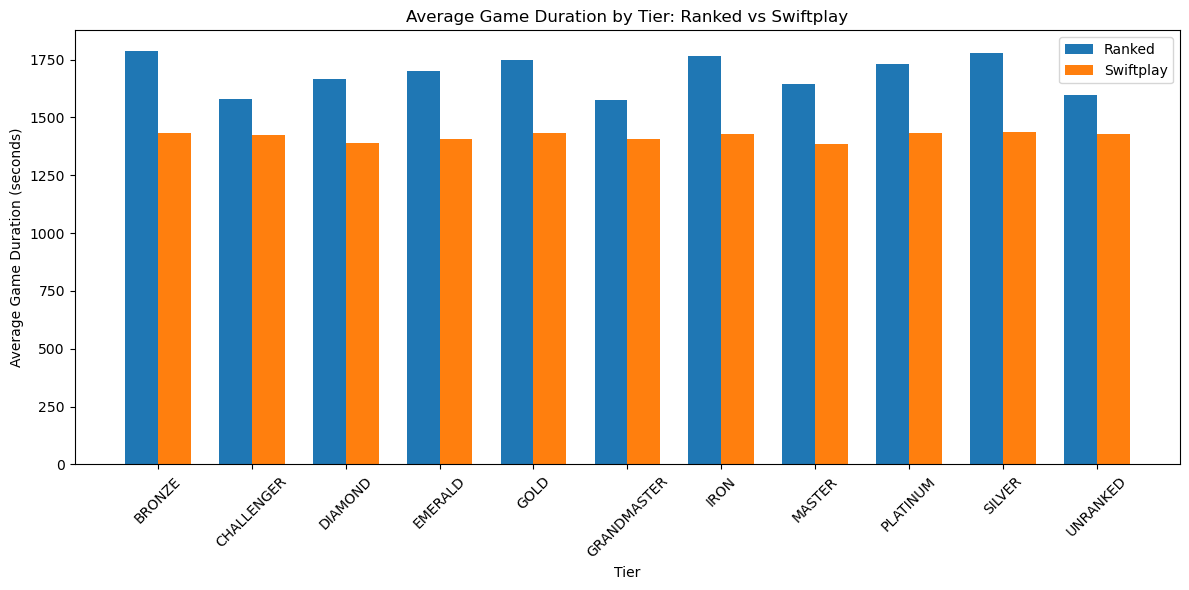

In [4]:
# Swiftplay duration vs Ranked duration

# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")
ranked_duration = ranked_merged.groupby("tier")["gameDuration"].mean().reset_index()
ranked_duration = ranked_duration.sort_values("tier")

# Merge Swiftplay datasets
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")
swift_duration = swift_merged.groupby("tier")["gameDuration"].mean().reset_index()
swift_duration = swift_duration.sort_values("tier")

# Merge both on tier
combined = pd.merge(ranked_duration, swift_duration, on="tier", suffixes=("_Ranked", "_Swift"))

# Plotting side-by-side bar chart
x = np.arange(len(combined["tier"]))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, combined["gameDuration_Ranked"], width, label="Ranked")
plt.bar(x + width/2, combined["gameDuration_Swift"], width, label="Swiftplay")

plt.xlabel("Tier")
plt.ylabel("Average Game Duration (seconds)")
plt.title("Average Game Duration by Tier: Ranked vs Swiftplay")
plt.xticks(x, combined["tier"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Ranked - Early Surrender: 2.26%
Ranked - Regular Surrender: 26.23%
Swiftplay - Early Surrender: 3.70%
Swiftplay - Regular Surrender: 39.67%


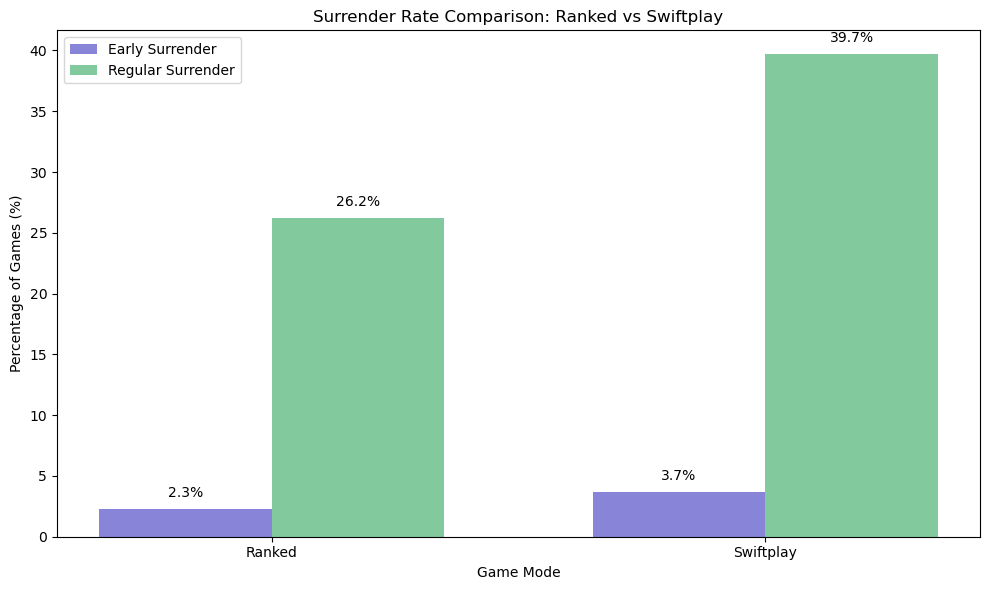

In [5]:
def get_surrender_percentage(groupby_obj):
    # count the occurrences of each boolean value
    counts = groupby_obj.size()
    # if true isn't in the index, that means there are no surrenders
    if True not in counts.index:
        return 0
    # calculate percentage of true values
    total = counts.sum()
    true_count = counts.get(True, 0)
    percentage = (true_count / total) * 100
    return percentage
# In all games, the percentage of gameEnded InEarlySurrender, and gameEndedInSurrender
# compare rate of games ended in early surrender and games ended in surrender in ranked with
# games ended in early surrender and games ended in surrender in swiftplay
swiftplay_early_surrender = swift_match_data.groupby("gameEndedInEarlySurrender")
swiftplay_surrender = swift_match_data.groupby("gameEndedInSurrender")
ranked_early_surrender = rank_match_data.groupby("gameEndedInEarlySurrender")
ranked_surrender = rank_match_data.groupby("gameEndedInSurrender")
swiftplay_early_pct = get_surrender_percentage(swiftplay_early_surrender)
swiftplay_regular_pct = get_surrender_percentage(swiftplay_surrender)
ranked_early_pct = get_surrender_percentage(ranked_early_surrender)
ranked_regular_pct = get_surrender_percentage(ranked_surrender)
print(f"Ranked - Early Surrender: {ranked_early_pct:.2f}%")
print(f"Ranked - Regular Surrender: {ranked_regular_pct:.2f}%")
print(f"Swiftplay - Early Surrender: {swiftplay_early_pct:.2f}%")
print(f"Swiftplay - Regular Surrender: {swiftplay_regular_pct:.2f}%")
data = {
    'Game Mode': ['Ranked', 'Ranked', 'Swiftplay', 'Swiftplay'],
    'Surrender Type': ['Early Surrender', 'Regular Surrender', 'Early Surrender', 'Regular Surrender'],
    'Percentage': [ranked_early_pct, ranked_regular_pct, swiftplay_early_pct, swiftplay_regular_pct]
}
plot_df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
x = np.array([0, 1])
width = 0.35
plt.bar(x - width/2, [ranked_early_pct, swiftplay_early_pct], width,
        label='Early Surrender', color='#8884D8')
plt.bar(x + width/2, [ranked_regular_pct, swiftplay_regular_pct], width,
        label='Regular Surrender', color='#82CA9D')
plt.xlabel('Game Mode')
plt.ylabel('Percentage of Games (%)')
plt.title('Surrender Rate Comparison: Ranked vs Swiftplay')
plt.xticks(x, ['Ranked', 'Swiftplay'])
plt.legend()
plt.text(x[0] - width/2, ranked_early_pct + 1, f'{ranked_early_pct:.1f}%', ha='center')
plt.text(x[0] + width/2, ranked_regular_pct + 1, f'{ranked_regular_pct:.1f}%', ha='center')
plt.text(x[1] - width/2, swiftplay_early_pct + 1, f'{swiftplay_early_pct:.1f}%', ha='center')
plt.text(x[1] + width/2, swiftplay_regular_pct + 1, f'{swiftplay_regular_pct:.1f}%', ha='center')
plt.tight_layout()
plt.show()

In [6]:
# Out of those who surrender, how are they divided by rank for both swiftplay and ranked?
# left join rankedplayermatchdata with rankedmatches by matchid, filter out games without surrender, merge with players by puuid, access how many of
# each tier exist in pie chart

# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")

ranked_surrendered = ranked_merged[(ranked_merged["gameEndedInEarlySurrender"] == True) | 
                                  (ranked_merged["gameEndedInSurrender"] == True)]

# For Swiftplay games
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")

swift_surrendered = swift_merged[(swift_merged["gameEndedInEarlySurrender"] == True) | 
                                (swift_merged["gameEndedInSurrender"] == True)]



Tier Distribution:
tier
UNRANKED       48558
SILVER         39252
GOLD           34610
BRONZE         33872
PLATINUM       25256
EMERALD        21386
IRON           14696
DIAMOND        10651
MASTER          2724
GRANDMASTER      294
CHALLENGER        82
Name: count, dtype: int64


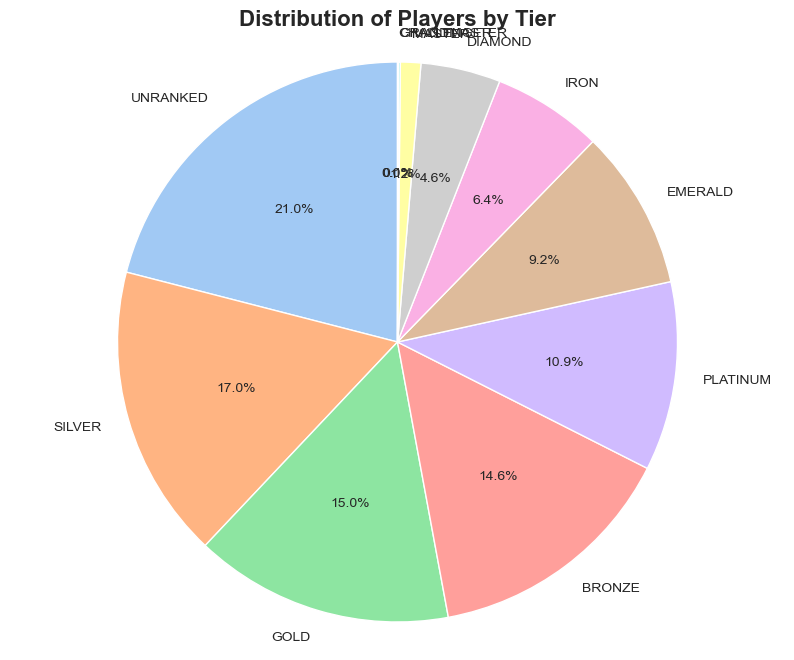

In [7]:
# TODO: 
tier_counts = ranked_merged.groupby('puuid')['tier'].first().value_counts()
swiftplay_filtered = swift_merged[~swift_merged['puuid'].isin(ranked_merged['puuid'])]
tier_counts2 = swiftplay_filtered.groupby('puuid')['tier'].first().value_counts()
tier_counts.add(tier_counts2)


plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

plt.pie(tier_counts.values, labels=tier_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), 
        startangle=90, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Distribution of Players by Tier', fontsize=16, fontweight='bold')
plt.axis('equal')
print("Tier Distribution:")
print(tier_counts)

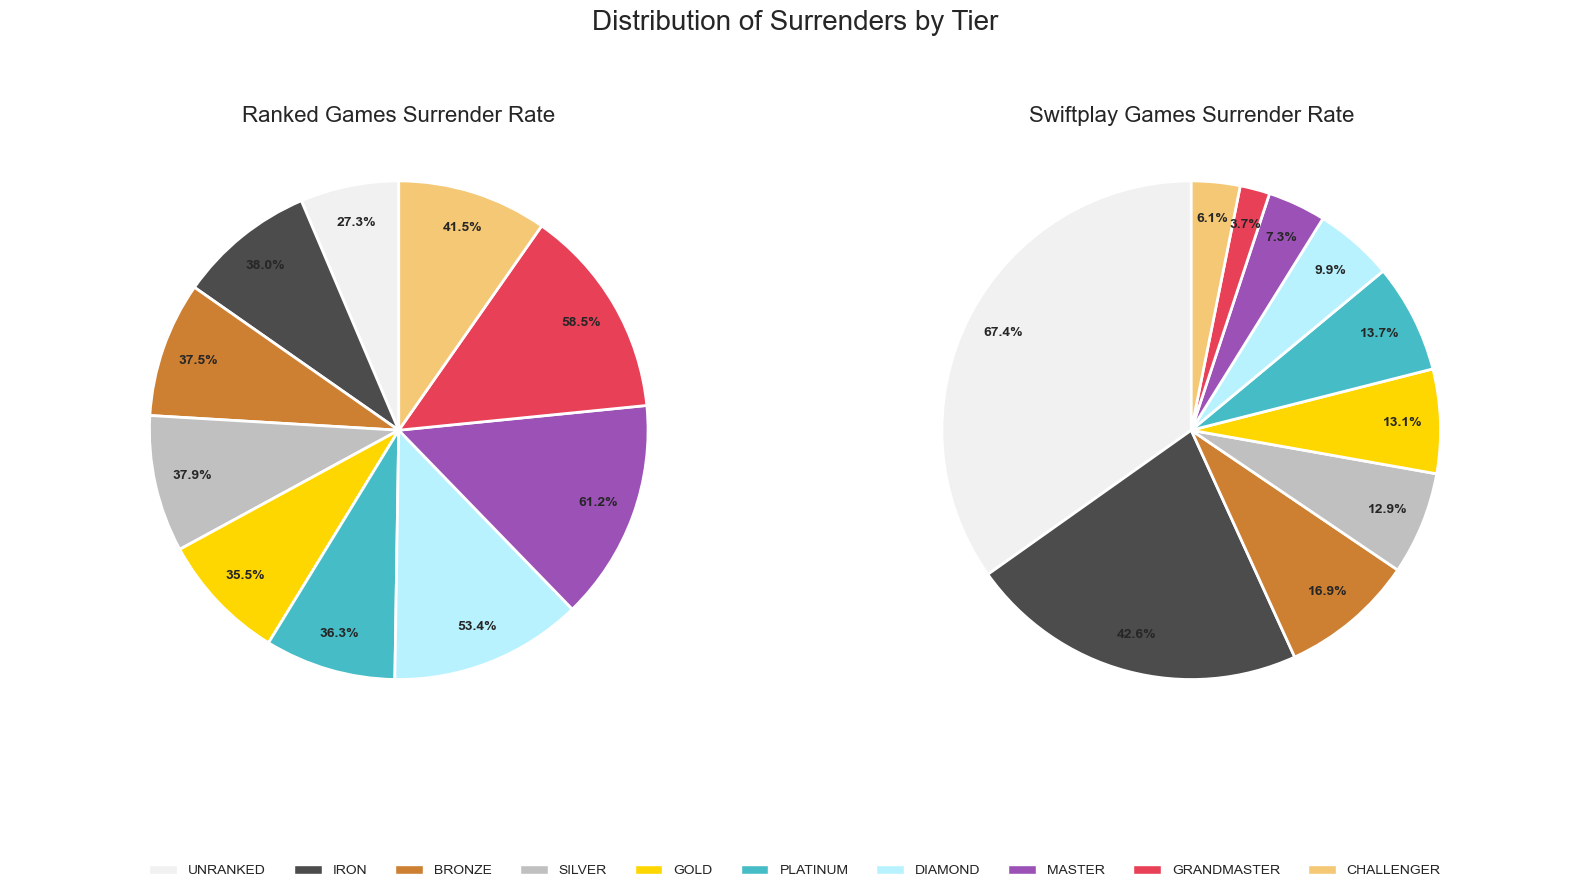

Ranked Games Surrender Rates:
tier
UNRANKED       0.272787
IRON           0.379831
BRONZE         0.374528
SILVER         0.378605
GOLD           0.355389
PLATINUM       0.362765
DIAMOND        0.533940
MASTER         0.611601
GRANDMASTER    0.585034
CHALLENGER     0.414634
Name: count, dtype: float64

Swiftplay Games Surrender Rates:
tier
UNRANKED       0.673669
IRON           0.425694
BRONZE         0.168664
SILVER         0.129165
GOLD           0.130743
PLATINUM       0.136720
DIAMOND        0.099052
MASTER         0.073054
GRANDMASTER    0.037415
CHALLENGER     0.060976
Name: count, dtype: float64


In [8]:


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

ranked_tier_counts = ranked_surrendered['tier'].value_counts()
swift_tier_counts = swift_surrendered['tier'].value_counts()

tier_order = ['UNRANKED','IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRANDMASTER', 'CHALLENGER']
ranked_tier_counts = ranked_tier_counts.reindex(tier_order).dropna()
swift_tier_counts = swift_tier_counts.reindex(tier_order).dropna()
tier_counts_ordered = tier_counts.reindex(tier_order).dropna()

ranked_proportions = ranked_tier_counts / tier_counts_ordered
swift_proportions = swift_tier_counts / tier_counts_ordered

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Distribution of Surrenders by Tier', fontsize=20, y=1.05)

colors = {
    'UNRANKED': '#f1f1f1',   # White
    'IRON': '#4c4c4c',      # Dark gray
    'BRONZE': '#cd7f32',    # Bronze
    'SILVER': '#c0c0c0',    # Silver
    'GOLD': '#ffd700',      # Gold
    'PLATINUM': '#46bdc6',  # Teal
    'DIAMOND': '#b9f2ff',   # Light blue
    'MASTER': '#9c51b6',    # Purple
    'GRANDMASTER': '#e84057', # Red
    'CHALLENGER': '#f4c874'  # Light gold
}

ranked_colors = [colors[tier] for tier in ranked_tier_counts.index]
swift_colors = [colors[tier] for tier in swift_tier_counts.index]

ranked_wedges, _ = ax1.pie(
    ranked_proportions, 
    labels=None,
    colors=ranked_colors,
    autopct=None, 
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

for i, p in enumerate(ranked_wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = 0.85 * np.cos(np.deg2rad(ang))
    y = 0.85 * np.sin(np.deg2rad(ang))
    ax1.text(x, y, f'{ranked_proportions.iloc[i]*100:.1f}%', 
             ha='center', va='center', fontweight='bold')

ax1.set_title('Ranked Games Surrender Rate', fontsize=16)

swift_wedges, _ = ax2.pie(
    swift_proportions, 
    labels=None,
    colors=swift_colors,
    autopct=None,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

for i, p in enumerate(swift_wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = 0.85 * np.cos(np.deg2rad(ang))
    y = 0.85 * np.sin(np.deg2rad(ang))
    ax2.text(x, y, f'{swift_proportions.iloc[i]*100:.1f}%', 
             ha='center', va='center', fontweight='bold')

ax2.set_title('Swift Play Games Surrender Rate', fontsize=16)

patches = [plt.Rectangle((0, 0), 1, 1, fc=colors[tier]) for tier in tier_order if tier in ranked_proportions.index]
plt.figlegend(patches, 
              [tier for tier in tier_order if tier in ranked_proportions.index],
              loc='lower center', 
              ncol=len(ranked_proportions), 
              bbox_to_anchor=(0.5, -0.05),
              frameon=False)

ax2.set_title('Swiftplay Games Surrender Rate', fontsize=16)

ax1.axis('equal')
ax2.axis('equal')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

print("Ranked Games Surrender Rates:")
print(ranked_proportions)
print("\nSwiftplay Games Surrender Rates:")
print(swift_proportions)

In [9]:
# Average amount of time spent dead; Average amount of time spent dead by rank(??)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import get_all_data
player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()
print(rank_player_match_data.columns)
print(player_data.columns)
print(rank_match_data.columns)
print(swift_match_data.columns)
print(swift_player_match_data.columns)

Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank'],
      dtype='object')
Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='obj

Overall Average Time Spent Dead in Ranked: 234.52 seconds


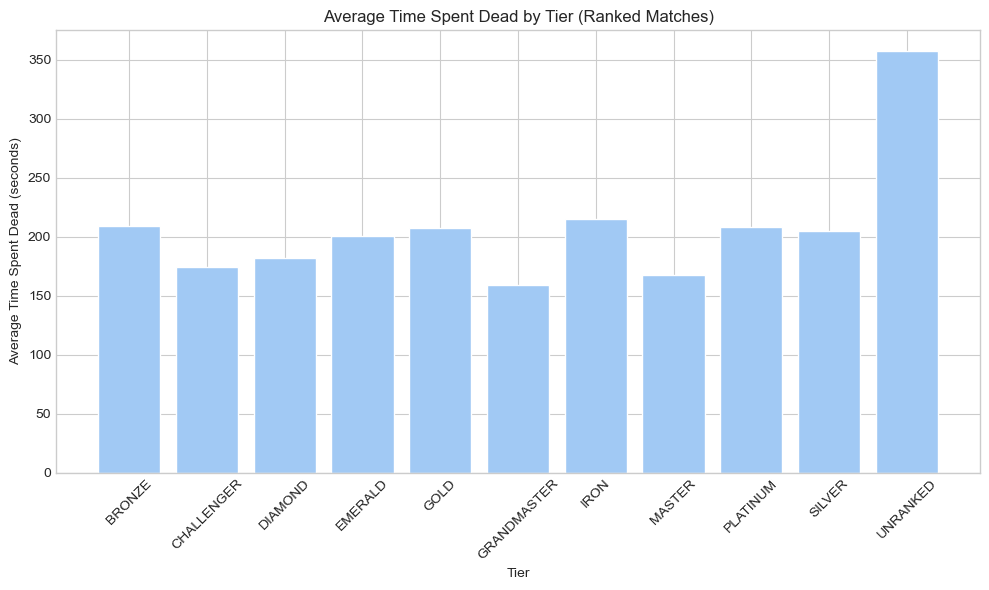

In [10]:
avg_dead_ranked = rank_player_match_data["totalTimeSpentDead"].astype(float).mean()
print(f"Overall Average Time Spent Dead in Ranked: {avg_dead_ranked:.2f} seconds")
# Convert to numeric in case it's read as string
rank_player_match_data["totalTimeSpentDead"] = rank_player_match_data["totalTimeSpentDead"].astype(float)
# Group by tier and calculate the mean
avg_dead_by_tier = rank_player_match_data.groupby("tier")["totalTimeSpentDead"].mean().reset_index()
# Optional: enforce tier order (if tier is categorical like Iron, Bronze, etc.)
# If it's numeric, we just sort
avg_dead_by_tier = avg_dead_by_tier.sort_values("tier")
plt.figure(figsize=(10, 6))
plt.bar(avg_dead_by_tier["tier"].astype(str), avg_dead_by_tier["totalTimeSpentDead"])
plt.xlabel("Tier")
plt.ylabel("Average Time Spent Dead (seconds)")
plt.title("Average Time Spent Dead by Tier (Ranked Matches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall Average Deaths per Player in Swiftplay: 160.12


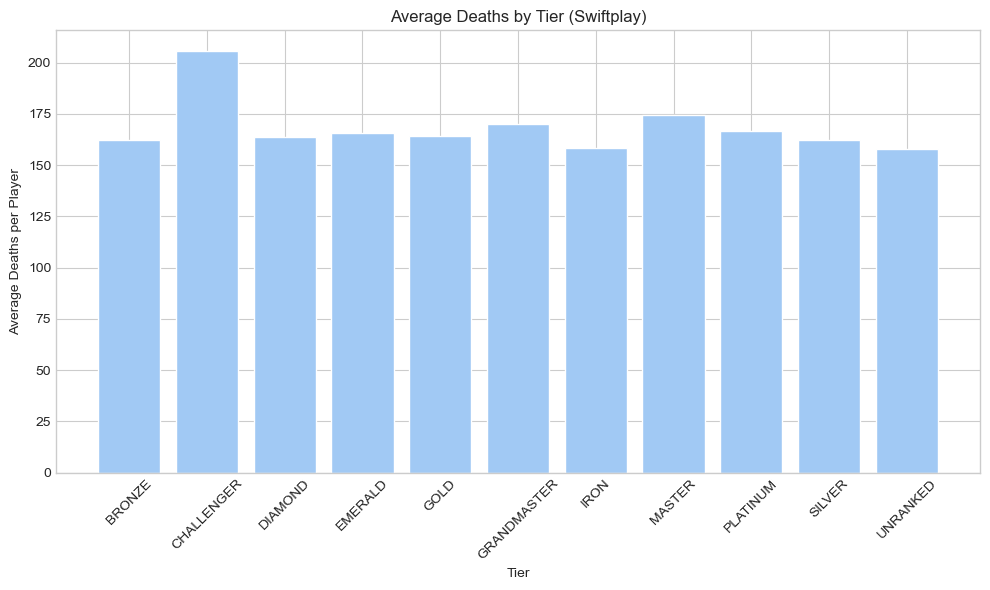

In [11]:
swift_player_match_data["totalTimeSpentDead"] = swift_player_match_data["totalTimeSpentDead"].astype(float)
avg_deaths_swift = swift_player_match_data["totalTimeSpentDead"].mean()
print(f"Overall Average Deaths per Player in Swiftplay: {avg_deaths_swift:.2f}")
avg_deaths_by_tier_swift = swift_player_match_data.groupby("tier")["totalTimeSpentDead"].mean().reset_index()
avg_deaths_by_tier_swift = avg_deaths_by_tier_swift.sort_values("tier")
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_deaths_by_tier_swift["tier"].astype(str), avg_deaths_by_tier_swift["totalTimeSpentDead"])
plt.xlabel("Tier")
plt.ylabel("Average Deaths per Player")
plt.title("Average Deaths by Tier (Swiftplay)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

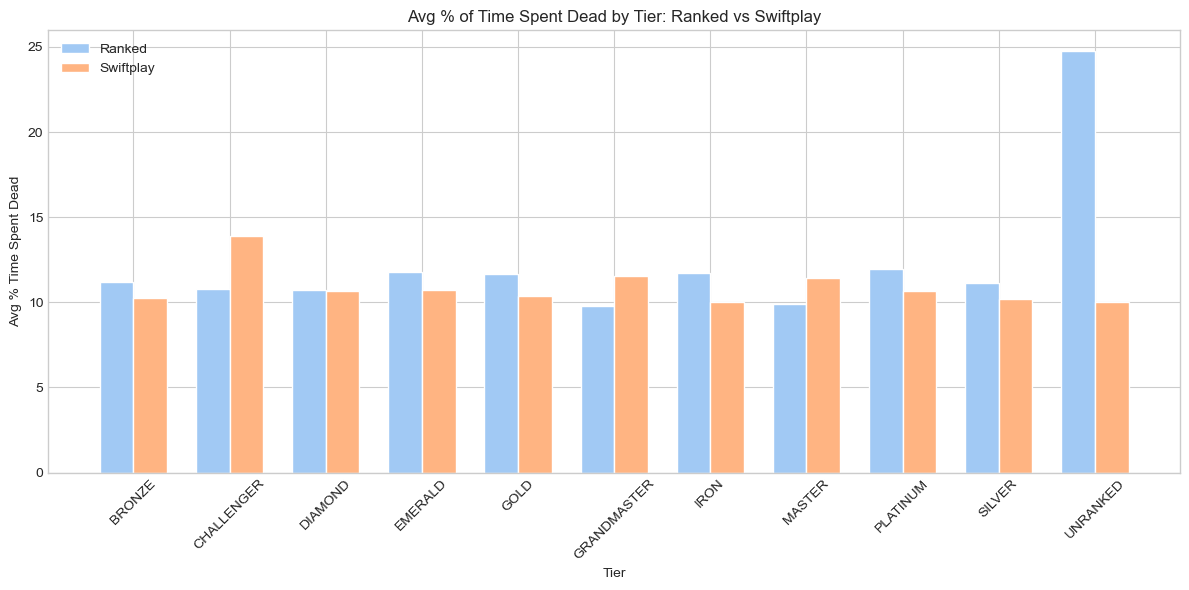

In [12]:
# Convert columns to numeric
rank_player_match_data["totalTimeSpentDead"] = rank_player_match_data["totalTimeSpentDead"].astype(float)
rank_player_match_data["timePlayed"] = rank_player_match_data["timePlayed"].astype(float)
ranked_valid = rank_player_match_data[rank_player_match_data["timePlayed"] > 0].copy()
# Compute dead-time ratio per player
ranked_valid["dead_time_ratio"] = ranked_valid["totalTimeSpentDead"] / ranked_valid["timePlayed"]
# Group by tier
ranked_ratio_by_tier = ranked_valid.groupby("tier")["dead_time_ratio"].mean().reset_index()
ranked_ratio_by_tier = ranked_ratio_by_tier.sort_values("tier")
swift_player_match_data["totalTimeSpentDead"] = swift_player_match_data["totalTimeSpentDead"].astype(float)
# Merge with match data to get timePlayed (from match duration)
swift_merged = pd.merge(swift_player_match_data, swift_match_data[["matchId", "gameDuration"]], on="matchId")
swift_merged["gameDuration"] = swift_merged["gameDuration"].astype(float)
swift_valid = swift_merged[swift_merged["gameDuration"] > 0].copy()
swift_valid["dead_time_ratio"] = swift_valid["totalTimeSpentDead"] / swift_valid["timePlayed"]
# Group by tier
swift_ratio_by_tier = swift_valid.groupby("tier")["dead_time_ratio"].mean().reset_index()
swift_ratio_by_tier = swift_ratio_by_tier.sort_values("tier")
ranked_ratio_by_tier.rename(columns={"dead_time_ratio": "Ranked"}, inplace=True)
swift_ratio_by_tier.rename(columns={"dead_time_ratio": "Swiftplay"}, inplace=True)
# Merge both
comparison_ratio = pd.merge(ranked_ratio_by_tier, swift_ratio_by_tier, on="tier")
x = np.arange(len(comparison_ratio))
width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, comparison_ratio["Ranked"] * 100, width, label="Ranked")
plt.bar(x + width/2, comparison_ratio["Swiftplay"] * 100, width, label="Swiftplay")
plt.xlabel("Tier")
plt.ylabel("Avg % Time Spent Dead")
plt.title("Avg % of Time Spent Dead by Tier: Ranked vs Swiftplay")
plt.xticks(x, comparison_ratio["tier"].astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

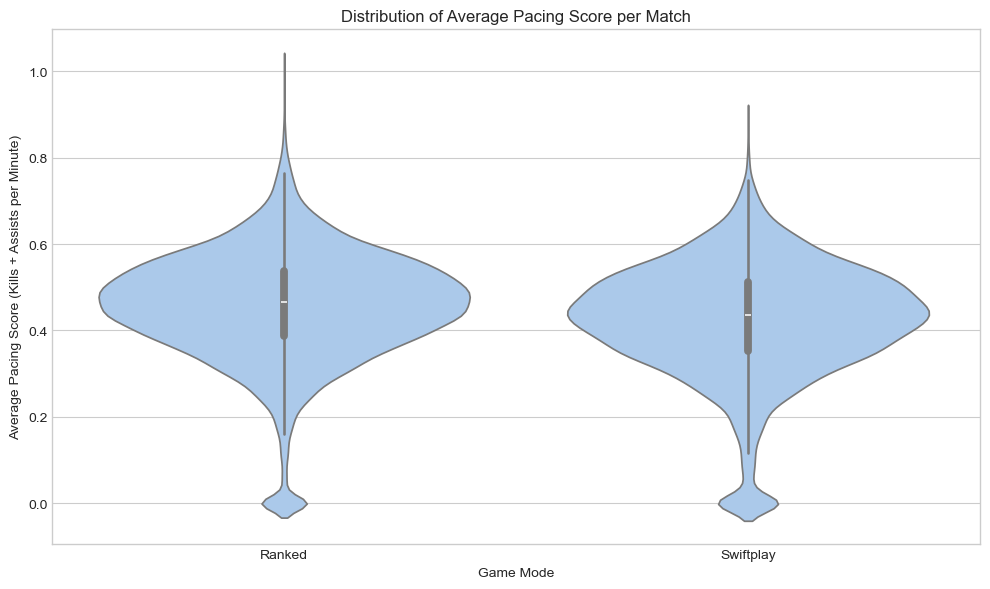

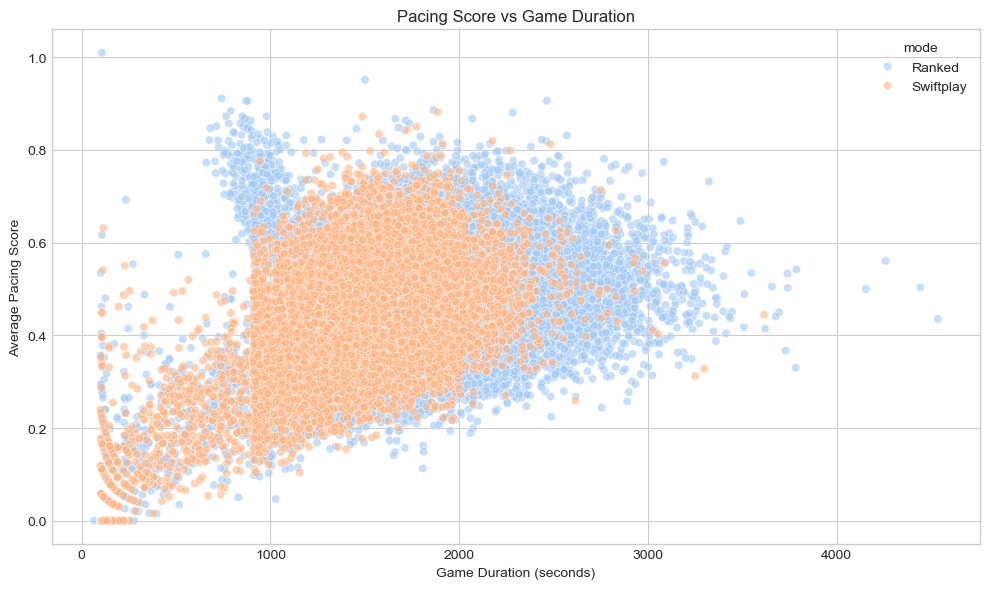

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate pacing score for each player
rank_player_match_data["pacingScore"] = (
    (rank_player_match_data["kills"] + rank_player_match_data["assists"]) /
    (rank_player_match_data["timePlayed"] / 60)
)

swift_player_match_data["pacingScore"] = (
    (swift_player_match_data["kills"] + swift_player_match_data["assists"]) /
    (swift_player_match_data["timePlayed"] / 60)
)

# Step 2: Merge with match data to attach game duration
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")

# Step 3: Compute average pacing per match
ranked_pacing_by_match = ranked_merged.groupby("matchId").agg({
    "pacingScore": "mean",
    "gameDuration": "first"
}).reset_index()
ranked_pacing_by_match["mode"] = "Ranked"

swift_pacing_by_match = swift_merged.groupby("matchId").agg({
    "pacingScore": "mean",
    "gameDuration": "first"
}).reset_index()
swift_pacing_by_match["mode"] = "Swiftplay"

# Step 4: Combine for comparison
combined_pacing = pd.concat([ranked_pacing_by_match, swift_pacing_by_match])

# Step 5: Visualization

# Violin plot: pacing score distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_pacing, x="mode", y="pacingScore")
plt.title("Distribution of Average Pacing Score per Match")
plt.xlabel("Game Mode")
plt.ylabel("Average Pacing Score (Kills + Assists per Minute)")
plt.tight_layout()
plt.show()

# Scatter plot: pacing score vs game duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_pacing, x="gameDuration", y="pacingScore", hue="mode", alpha=0.6)
plt.title("Pacing Score vs Game Duration")
plt.xlabel("Game Duration (seconds)")
plt.ylabel("Average Pacing Score")
plt.tight_layout()
plt.show()

## Interpretations:
# Despite Swiftplay being a shorter game mode, its pacing isn’t necessarily faster than Ranked. 
# In fact, Ranked games may be slightly more aggressive overall.

# Interestingly, high pacing scores are more frequent in shorter games, especially in Ranked mode.
# Shorter games, especially in Ranked, tend to be more fast-paced or one-sided.
# Swiftplay matches tend to have moderate pacing and are tightly distributed in duration.

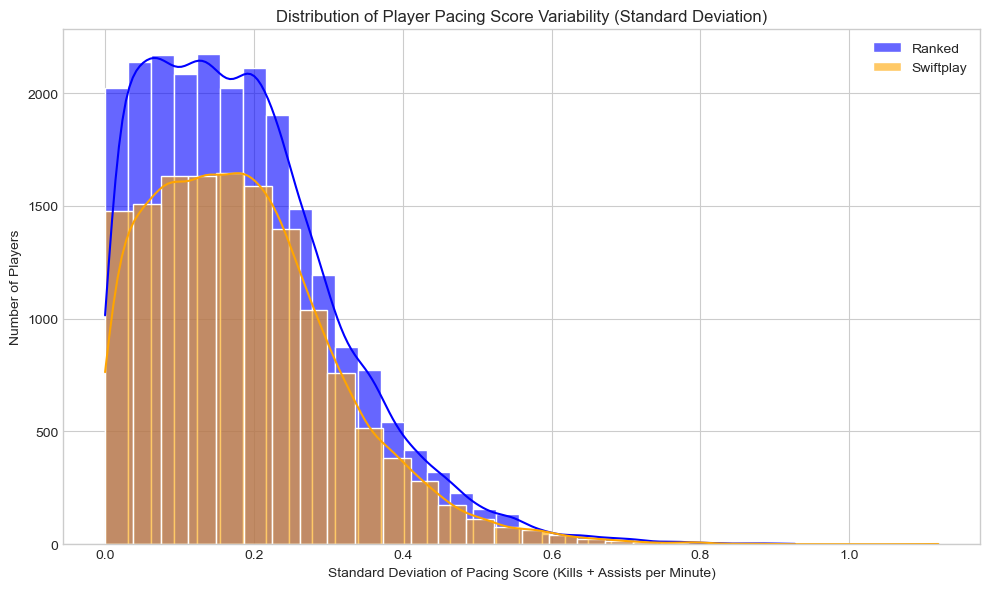

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()

# Remove entries with timePlayed = 0 to avoid divide-by-zero errors
rank_player_match_data = rank_player_match_data[rank_player_match_data["timePlayed"] > 0]
swift_player_match_data = swift_player_match_data[swift_player_match_data["timePlayed"] > 0]

# Compute pacing score: (kills + assists) per minute
rank_player_match_data["pacingScore"] = (
    (rank_player_match_data["kills"] + rank_player_match_data["assists"]) /
    (rank_player_match_data["timePlayed"] / 60)
)

swift_player_match_data["pacingScore"] = (
    (swift_player_match_data["kills"] + swift_player_match_data["assists"]) /
    (swift_player_match_data["timePlayed"] / 60)
)

# Group by player and compute standard deviation of pacing score (i.e. consistency)
ranked_consistency = rank_player_match_data.groupby("puuid")["pacingScore"].std().reset_index()
ranked_consistency.columns = ["puuid", "std_pacing_ranked"]
ranked_consistency["mode"] = "Ranked"

swift_consistency = swift_player_match_data.groupby("puuid")["pacingScore"].std().reset_index()
swift_consistency.columns = ["puuid", "std_pacing_swift"]
swift_consistency["mode"] = "Swiftplay"

# Optional: combine to see players across both modes
combined_consistency = pd.merge(
    ranked_consistency[["puuid", "std_pacing_ranked"]],
    swift_consistency[["puuid", "std_pacing_swift"]],
    on="puuid",
    how="outer"
)

# Plot distribution of standard deviation (pacing consistency)
plt.figure(figsize=(10, 6))
sns.histplot(ranked_consistency["std_pacing_ranked"].dropna(), kde=True, bins=30,
             color="blue", label="Ranked", alpha=0.6)
sns.histplot(swift_consistency["std_pacing_swift"].dropna(), kde=True, bins=30,
             color="orange", label="Swiftplay", alpha=0.6)

plt.title("Distribution of Player Pacing Score Variability (Standard Deviation)")
plt.xlabel("Standard Deviation of Pacing Score (Kills + Assists per Minute)")
plt.ylabel("Number of Players")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
print(rank_player_match_data.columns)
print(player_data.columns)
print(rank_match_data.columns)
print(swift_match_data.columns)
print(swift_player_match_data.columns)

Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank', 'pacingScore'],
      dtype='object')
Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
 